In [1]:
import spot, buddy

# Partitioned relabeling

Partitioned relabeling will:
First compute a partition over all conditions appearing in the automaton.
That is, the set of new conditions is such that (1) they do not overlap (2) all valuations that verify some condition in the original automaton also verify (exactly one) of the new conditions.
These new conditions can be thought of as letters in a "classical" sense.
Then we create new aps and encode the "number" of these letters using the fresh aps, resulting in new letters which are a single valuation over the fresh aps.

This can be helpful if there are many aps, but few different conditions over them

The algorithm comes in two flavours:

We maintain the original number of edges. Therefore the new label correspond to a disjunction over new letters (split=False).
We split each edge into its letters, creating more edges (split=True).

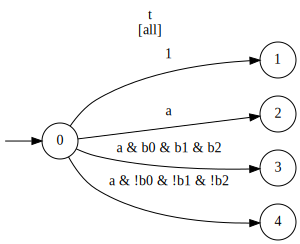

In [2]:
#Relabeling a graph
aut = spot.make_twa_graph()
aut.new_states(5)

a = buddy.bdd_ithvar(aut.register_ap("a"))
na = buddy.bdd_nithvar(aut.register_ap("a"))
b0 = buddy.bdd_ithvar(aut.register_ap("b0"))
nb0 = buddy.bdd_nithvar(aut.register_ap("b0"))
b1 = buddy.bdd_ithvar(aut.register_ap("b1"))
nb1 = buddy.bdd_nithvar(aut.register_ap("b1"))
b2 = buddy.bdd_ithvar(aut.register_ap("b2"))
nb2 = buddy.bdd_nithvar(aut.register_ap("b2"))

aut.new_edge(0,1,buddy.bddtrue)
aut.new_edge(0,2,a)
aut.new_edge(0,3,a&b0&b1&b2)
aut.new_edge(0,4,a&nb0&nb1&nb2)

aut

6


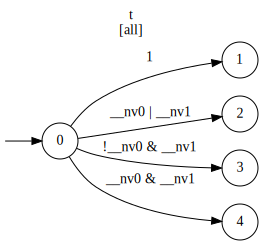

In [3]:
relabel_dict = spot.partitioned_relabel_here(aut)

print(relabel_dict.size())
aut

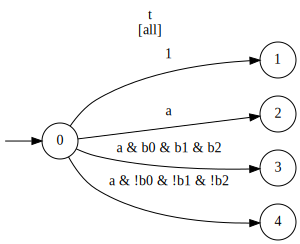

In [4]:
# Undo the relabeling
spot.relabel_here(aut, relabel_dict)
aut

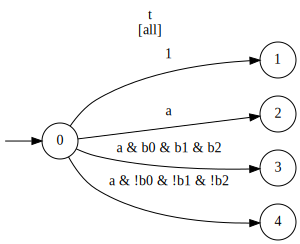

HOA: v1
States: 5
Start: 0
AP: 6 "a" "b0" "b1" "b2" "__nv0" "__nv1"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc
--BODY--
State: 0
[!4&!5] 1
[4&!5] 2
[!4&5] 3
[4&5] 4
[4&!5] 1
[4&5] 1
[!4&5] 1
[4&5] 2
[!4&5] 2
State: 1
State: 2
State: 3
State: 4
--END--


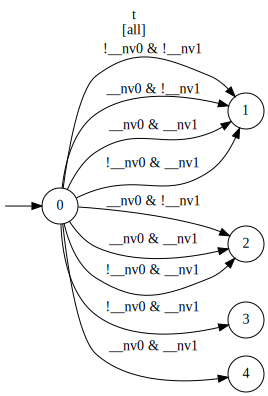

In [5]:
# Relabeling the same graph using the split option
aut = spot.make_twa_graph()
aut.new_states(5)

a = buddy.bdd_ithvar(aut.register_ap("a"))
na = buddy.bdd_nithvar(aut.register_ap("a"))
b0 = buddy.bdd_ithvar(aut.register_ap("b0"))
nb0 = buddy.bdd_nithvar(aut.register_ap("b0"))
b1 = buddy.bdd_ithvar(aut.register_ap("b1"))
nb1 = buddy.bdd_nithvar(aut.register_ap("b1"))
b2 = buddy.bdd_ithvar(aut.register_ap("b2"))
nb2 = buddy.bdd_nithvar(aut.register_ap("b2"))

aut.new_edge(0,1,buddy.bddtrue)
aut.new_edge(0,2,a)
aut.new_edge(0,3,a&b0&b1&b2)
aut.new_edge(0,4,a&nb0&nb1&nb2)

display(aut)
xx = spot.partitioned_relabel_here(aut, True)
print(aut.to_str("hoa"))
aut

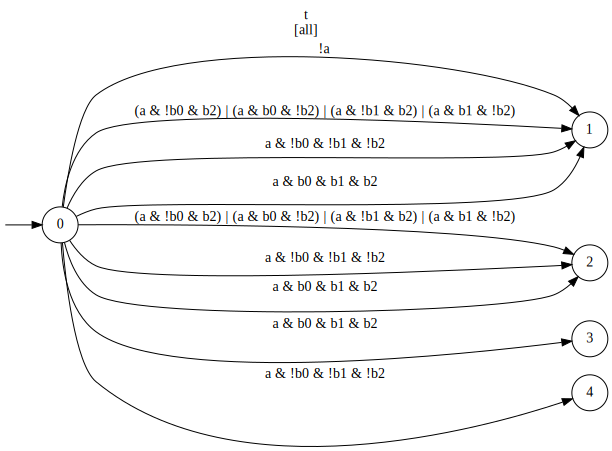

In [6]:
# Undo the relabeling -> disjoint conditions over the original ap
spot.relabel_here(aut, relabel_dict)
aut

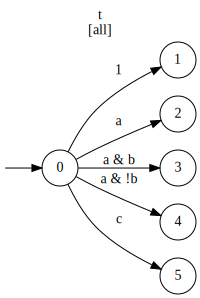

HOA: v1
States: 6
Start: 0
AP: 5 "a" "__nv0" "__nv1" "b" "c"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc
--BODY--
State: 0
[!1 | !2] 1
[!1&2 | 1&!2] 2
[!1&2] 3
[1&!2] 4
[4] 5
State: 1
State: 2
State: 3
State: 4
State: 5
--END--


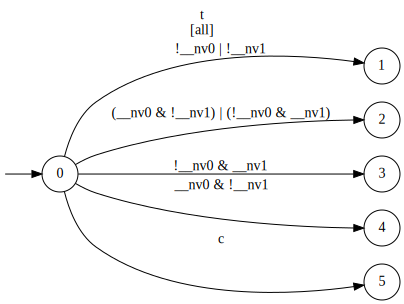

In [7]:
# Working only on a subset of the aps
# Note that True is always relabeled

aut = spot.make_twa_graph()
aut.new_states(6)

a = buddy.bdd_ithvar(aut.register_ap("a"))
na = buddy.bdd_nithvar(aut.register_ap("a"))
b = buddy.bdd_ithvar(aut.register_ap("b"))
nb = buddy.bdd_nithvar(aut.register_ap("b"))
c = buddy.bdd_ithvar(aut.register_ap("c"))
nc = buddy.bdd_nithvar(aut.register_ap("c"))

aut.new_edge(0,1,buddy.bddtrue)
aut.new_edge(0,2,a)
aut.new_edge(0,3,a&b)
aut.new_edge(0,4,a&nb)
aut.new_edge(0,5,c)

display(aut)

concerned_aps = a & b # concerned aps are given as a conjunction of positive aps
# As partitioning can be exponentially costly,
# one can limit the number of new letters generated before abandoning
# This can be done either as a hard limit and/or as the number of current condition
# times a factor
relabel_dict = spot.partitioned_relabel_here(aut, False, 1000, 1000, concerned_aps)
print(aut.to_str("hoa"))
aut

HOA: v1
States: 6
Start: 0
AP: 3 "a" "b" "c"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc
--BODY--
State: 0
[t] 1
[0] 2
[0&1] 3
[0&!1] 4
[2] 5
State: 1
State: 2
State: 3
State: 4
State: 5
--END--


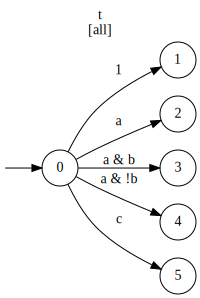

In [8]:
#undo partial relabeling
spot.relabel_here(aut, relabel_dict)
print(aut.to_str("hoa"))
aut

# Concerning games and Mealy machines

Games and split mealy machines have both: defined outputs and states that either belong to player or env.
Relabeling is done separately for env and player transitions (over inputs and outputs respectively).

The problem is that T (bddtrue) is ambiguous, as it may be over the inputs or outputs.

We therefore introduce a dedicated function for this matter.

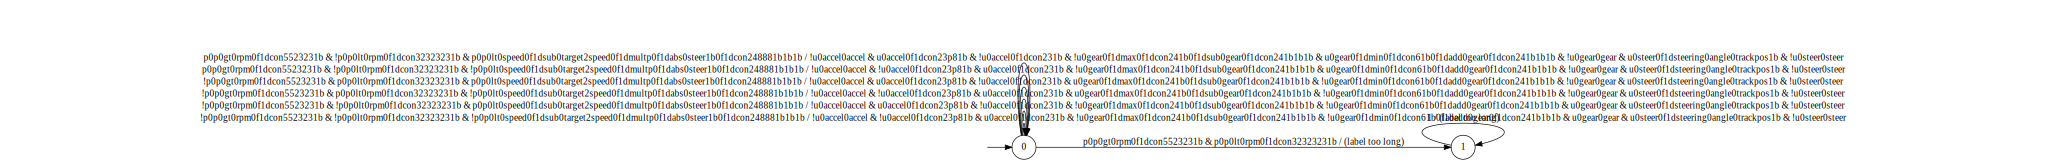

HOA: v1
States: 9
Start: 0
AP: 11 "u0accel0accel" "u0accel0f1dcon23p81b" "u0accel0f1dcon231b" "u0gear0f1dmin0f1dcon61b0f1dadd0gear0f1dcon241b1b1b" "u0gear0gear" "u0gear0f1dmax0f1dcon241b0f1dsub0gear0f1dcon241b1b1b" "u0steer0f1dsteering0angle0trackpos1b" "u0steer0steer" "p0p0gt0rpm0f1dcon5523231b" "p0p0lt0rpm0f1dcon32323231b" "p0p0lt0speed0f1dsub0target2speed0f1dmultp0f1dabs0steer1b0f1dcon248881b1b1b"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc deterministic
spot-state-player: 0 0 1 1 1 1 1 1 1
controllable-AP: 0 1 2 3 4 5 6 7
--BODY--
State: 0
[!8&!9&!10] 2
[!8&!9&10] 3
[!8&9&!10] 4
[!8&9&10] 5
[8&!9&!10] 6
[8&!9&10] 7
[8&9] 8
State: 1
[t] 8
State: 2
[!0&!1&2&!3&4&!5&6&!7] 0
State: 3
[!0&1&!2&!3&4&!5&6&!7] 0
State: 4
[!0&!1&2&!3&!4&5&6&!7] 0
State: 5
[!0&1&!2&!3&!4&5&6&!7] 0
State: 6
[!0&!1&2&3&!4&!5&6&!7] 0
State: 7
[!0&1&!2&3&!4&!5&6&!7] 0
State: 8
[!0&!1&2&!3&!4&5&!6&7 | !0&!1&2&!3&!4&5&6&!7 | !0&!1&2&!3&4&!5&!6&7 | !0&!1&2&!3&4&!5&6&!7 | !0&!1&2

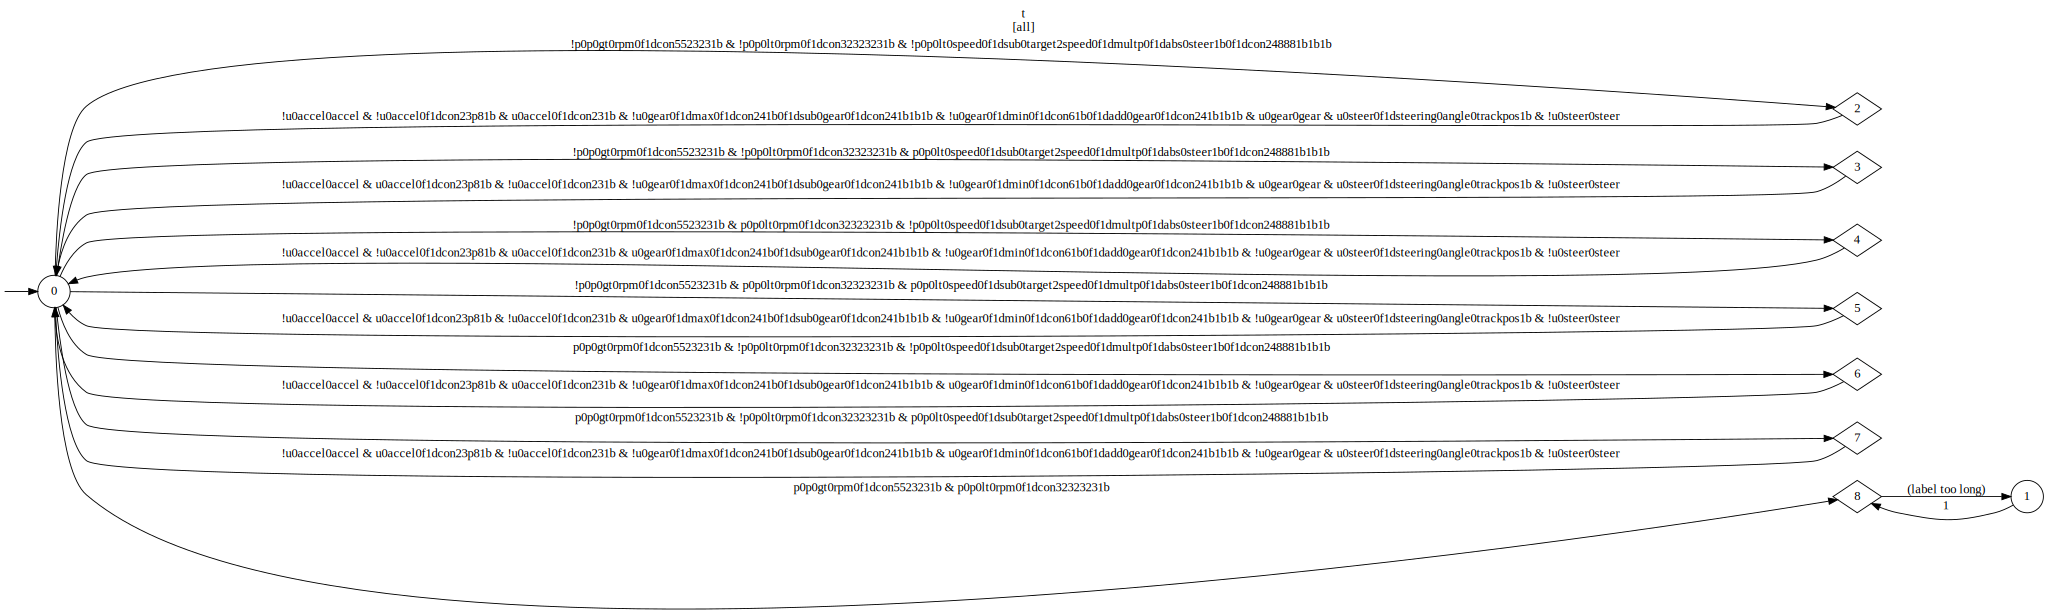

HOA: v1
States: 9
Start: 0
AP: 21 "u0accel0accel" "u0accel0f1dcon23p81b" "u0accel0f1dcon231b" "u0gear0f1dmin0f1dcon61b0f1dadd0gear0f1dcon241b1b1b" "u0gear0gear" "u0gear0f1dmax0f1dcon241b0f1dsub0gear0f1dcon241b1b1b" "u0steer0f1dsteering0angle0trackpos1b" "u0steer0steer" "p0p0gt0rpm0f1dcon5523231b" "p0p0lt0rpm0f1dcon32323231b" "p0p0lt0speed0f1dsub0target2speed0f1dmultp0f1dabs0steer1b0f1dcon248881b1b1b" "__AP_OUT__" "__AP_IN__" "__nv_in0" "__nv_in1" "__nv_in2" "__nv_in3" "__nv_out0" "__nv_out1" "__nv_out2" "__nv_out3"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc deterministic
spot-state-player: 0 0 1 1 1 1 1 1 1
controllable-AP: 0 1 2 3 4 5 6 7
--BODY--
State: 0
[!13&!14&!15&!16] 2
[13&!14&!15&!16] 3
[!13&14&!15&!16] 4
[13&14&!15&!16] 5
[!13&!14&15&!16] 6
[13&!14&15&!16] 7
[!13&14&15&!16] 8
[13&14&15&!16] 2
[!13&!14&!15&16] 3
[13&!14&!15&16] 4
[!13&14&!15&16] 5
[13&14&!15&16] 6
[!13&!14&15&16] 7
State: 1
[13&14&15&!16] 8
[!13&!14&!15&16] 8
[13&!14&!15&1

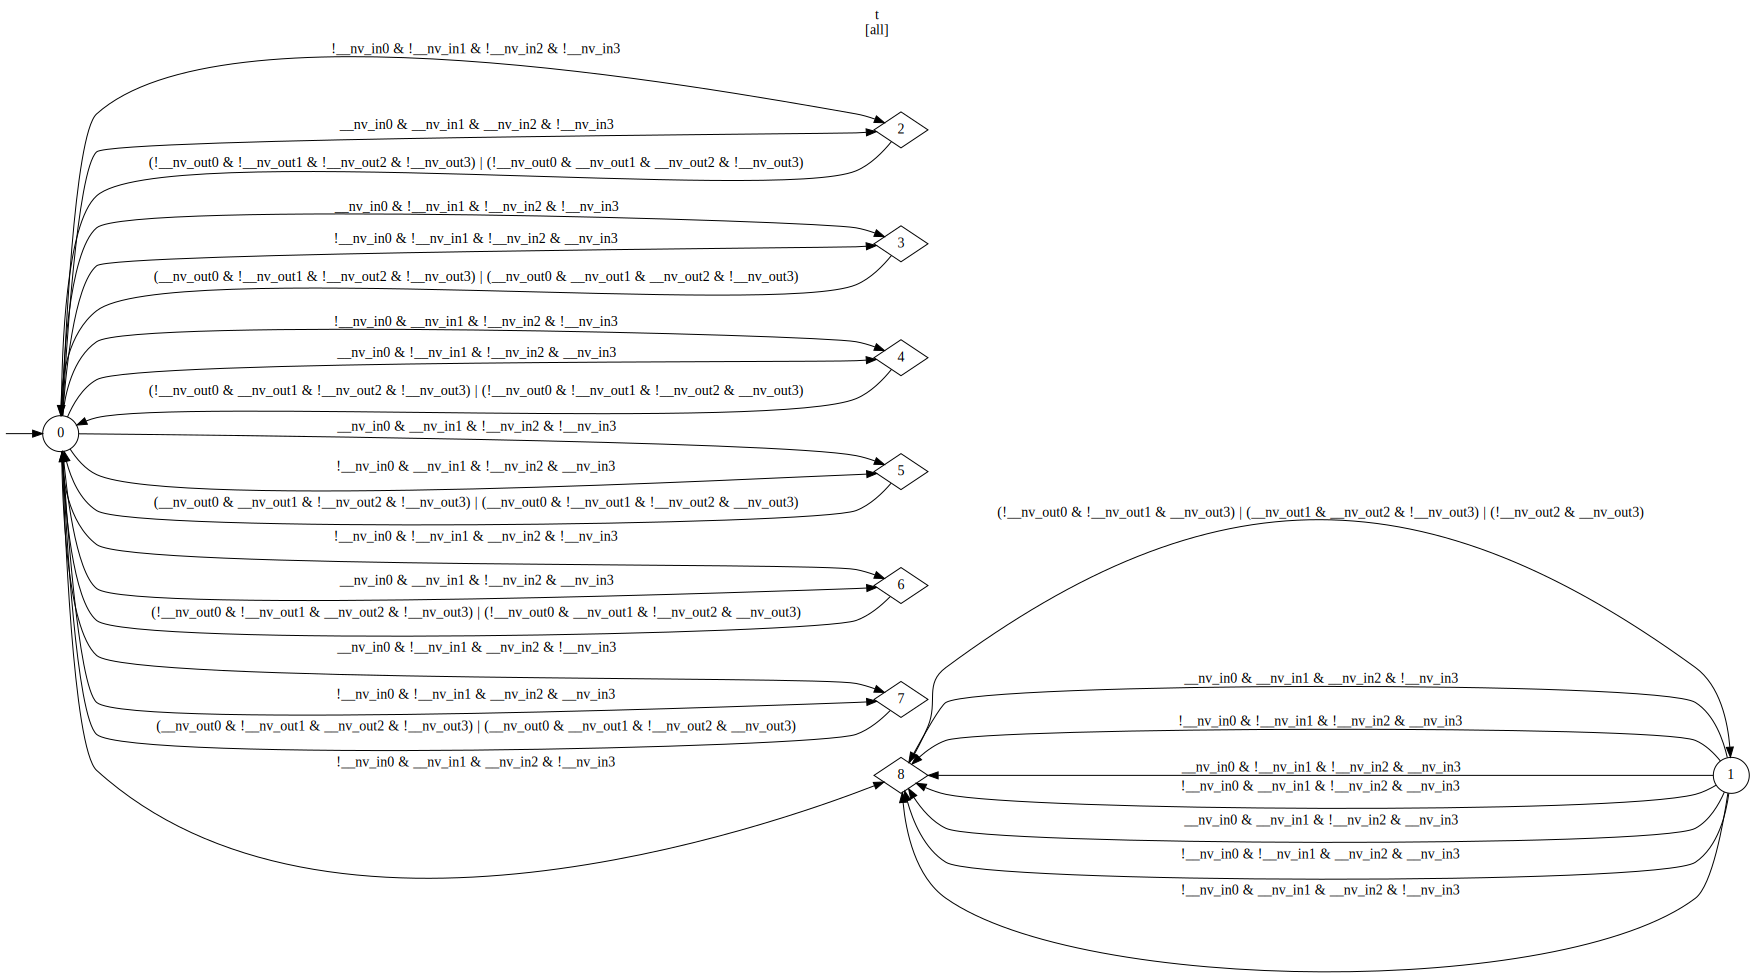

In [9]:
# Strategy torquesimple_acd as mealy machine

aut = spot.automaton("""HOA: v1
States: 2
Start: 0
AP: 11 "u0accel0accel" "u0accel0f1dcon23p81b" "u0accel0f1dcon231b" "u0gear0f1dmin0f1dcon61b0f1dadd0gear0f1dcon241b1b1b" "u0gear0gear" "u0gear0f1dmax0f1dcon241b0f1dsub0gear0f1dcon241b1b1b" "u0steer0f1dsteering0angle0trackpos1b" "u0steer0steer" "p0p0gt0rpm0f1dcon5523231b" "p0p0lt0rpm0f1dcon32323231b" "p0p0lt0speed0f1dsub0target2speed0f1dmultp0f1dabs0steer1b0f1dcon248881b1b1b"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc deterministic
controllable-AP: 0 1 2 3 4 5 6 7
--BODY--
State: 0
[!0&!1&2&!3&4&!5&6&!7&!8&!9&!10] 0
[!0&1&!2&!3&4&!5&6&!7&!8&!9&10] 0
[!0&!1&2&!3&!4&5&6&!7&!8&9&!10] 0
[!0&1&!2&!3&!4&5&6&!7&!8&9&10] 0
[!0&!1&2&3&!4&!5&6&!7&8&!9&!10] 0
[!0&1&!2&3&!4&!5&6&!7&8&!9&10] 0
[!0&!1&2&!3&!4&5&!6&7&8&9 | !0&!1&2&!3&!4&5&6&!7&8&9 | !0&!1&2&!3&4&!5&!6&7&8&9 | !0&!1&2&!3&4&!5&6&!7&8&9 | !0&!1&2&3&!4&!5&!6&7&8&9 | !0&!1&2&3&!4&!5&6&!7&8&9 | !0&1&!2&!3&!4&5&!6&7&8&9 | !0&1&!2&!3&!4&5&6&!7&8&9 | !0&1&!2&!3&4&!5&!6&7&8&9 | !0&1&!2&!3&4&!5&6&!7&8&9 | !0&1&!2&3&!4&!5&!6&7&8&9 | !0&1&!2&3&!4&!5&6&!7&8&9 | 0&!1&!2&!3&!4&5&!6&7&8&9 | 0&!1&!2&!3&!4&5&6&!7&8&9 | 0&!1&!2&!3&4&!5&!6&7&8&9 | 0&!1&!2&!3&4&!5&6&!7&8&9 | 0&!1&!2&3&!4&!5&!6&7&8&9 | 0&!1&!2&3&!4&!5&6&!7&8&9] 1
State: 1
[!0&!1&2&!3&!4&5&!6&7 | !0&!1&2&!3&!4&5&6&!7 | !0&!1&2&!3&4&!5&!6&7 | !0&!1&2&!3&4&!5&6&!7 | !0&!1&2&3&!4&!5&!6&7 | !0&!1&2&3&!4&!5&6&!7 | !0&1&!2&!3&!4&5&!6&7 | !0&1&!2&!3&!4&5&6&!7 | !0&1&!2&!3&4&!5&!6&7 | !0&1&!2&!3&4&!5&6&!7 | !0&1&!2&3&!4&!5&!6&7 | !0&1&!2&3&!4&!5&6&!7 | 0&!1&!2&!3&!4&5&!6&7 | 0&!1&!2&!3&!4&5&6&!7 | 0&!1&!2&!3&4&!5&!6&7 | 0&!1&!2&!3&4&!5&6&!7 | 0&!1&!2&3&!4&!5&!6&7 | 0&!1&!2&3&!4&!5&6&!7] 1
--END--""")

display(aut)

# Convert to split mealy machine
auts = spot.split_2step(aut)
print(auts.to_str("hoa"))
display(auts)

# Relabel both, inputs and outputs
# You can choose the split option and stopping criteria as before
rel_dicts = spot.partitioned_game_relabel_here(auts, True, True, True, False, 10000, 10000)
print(auts.to_str("hoa"))
display(auts)

HOA: v1
States: 9
Start: 0
AP: 11 "u0accel0accel" "u0accel0f1dcon23p81b" "u0accel0f1dcon231b" "u0gear0f1dmin0f1dcon61b0f1dadd0gear0f1dcon241b1b1b" "u0gear0gear" "u0gear0f1dmax0f1dcon241b0f1dsub0gear0f1dcon241b1b1b" "u0steer0f1dsteering0angle0trackpos1b" "u0steer0steer" "p0p0gt0rpm0f1dcon5523231b" "p0p0lt0rpm0f1dcon32323231b" "p0p0lt0speed0f1dsub0target2speed0f1dmultp0f1dabs0steer1b0f1dcon248881b1b1b"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc deterministic
spot-state-player: 0 0 1 1 1 1 1 1 1
controllable-AP: 0 1 2 3 4 5 6 7
--BODY--
State: 0
[f] 2
[f] 3
[f] 4
[f] 5
[f] 6
[f] 7
[8&9] 8
[!8&!9&!10] 2
[!8&!9&10] 3
[!8&9&!10] 4
[!8&9&10] 5
[8&!9&!10] 6
[8&!9&10] 7
State: 1
[!8&!9&!10] 8
[!8&!9&10] 8
[!8&9&!10] 8
[!8&9&10] 8
[8&!9&!10] 8
[8&!9&10] 8
[8&9] 8
State: 2
[!0&!1&2&!3&4&!5&6&!7] 0
State: 3
[!0&1&!2&!3&4&!5&6&!7] 0
State: 4
[!0&!1&2&!3&!4&5&6&!7] 0
State: 5
[!0&1&!2&!3&!4&5&6&!7] 0
State: 6
[!0&!1&2&3&!4&!5&6&!7] 0
State: 7
[!0&1&!2&3&!4&!5&6&

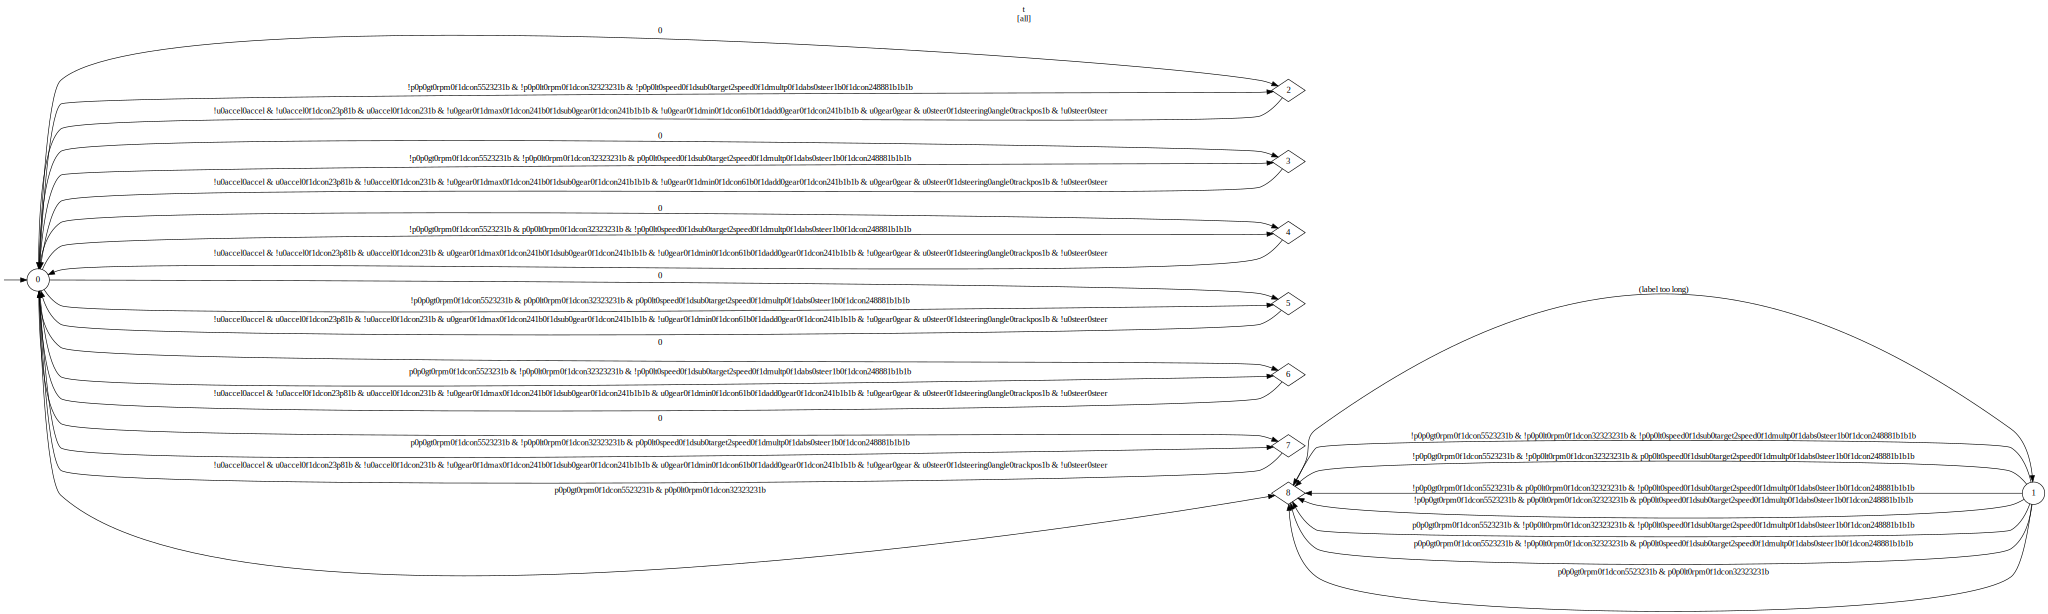

In [10]:
# Undo relabel
spot.relabel_game_here(auts, rel_dicts)
print(auts.to_str("hoa"))
display(auts)

In [11]:
# Check if we do actually obtain the same automaton

print(spot.are_equivalent(aut, spot.unsplit_2step(auts)))

True


In [12]:
# Test all options for equivalence
for relabel_env in [True, False]:
    for relabel_player in [True, False]:
        for split_env in [True, False]:
            for split_player in [True, False]:
                auts = spot.split_2step(aut)
                rel_dicts = spot.partitioned_game_relabel_here(auts, relabel_env, relabel_player, split_env, split_player, 10000, 10000)
                spot.relabel_game_here(auts, rel_dicts)
                print(spot.are_equivalent(aut, spot.unsplit_2step(auts)))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
